In [35]:
import os
import sys
import glob
import pandas as pd
import numpy as np
from collections import OrderedDict

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

from IPython.display import display, Markdown, clear_output, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive

import lasio
from welly import Well

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
warnings.filterwarnings(action="ignore", category=DeprecationWarning)
warnings.filterwarnings(action="ignore", category=FutureWarning)

%matplotlib inline

In [40]:
import src
from src.analysis.preprocessing import Analysis

SyntaxError: invalid syntax (preprocessing.py, line 93)

# Read in data

In [39]:
analysis = Analysis()

NameError: name 'Analysis' is not defined

In [36]:
FILE_PATH = r"F:\01-Project\01-Paper\01-Log_Prediction\data_local"
FILE_NAME = "Chinwol_1_from_rokdoc.{}".format("las")

LAS_FILE_EXT    = [".las", ".LAS", ""]

In [47]:
os.path.splitext(os.path.basename("Chinwol_1_from_rokdoc.las"))[0]

('Chinwol_1_from_rokdoc', '.las')

In [45]:
las_files = glob.glob(os.path.join(FILE_PATH, "*.las"))

well_df = {}
for files in las_files:
    print("  Reading {}".format(os.path.splitext(os.path.basename(files))[0]))
    well_name = os.path.splitext(os.path.basename(files))[0]
    print(well_name)
    well_df["{}".format(well_name)] = lasio.read("{}".format(files))
    well_df["{}".format(well_name)] = well_df["{}".format(well_name)].df()
    break
    
print("  done ...")

  Reading Chinwol_1_from_rokdoc
Chinwol_1_from_rokdoc


Header section Parameter regexp=~P was not found.


  done ...


In [38]:
display(Markdown("<h3>Well Logs Data Analysis</h3>"))
sections = ["Well Logs"]
loading_section = ["Data loading ..."]
summary_section = ["Summary", "Feature Dependency"]

sub_sections = ["Data Summary", "Well Logs Visualization", "Missing Analysis", "Outlier Analysis"]

accordions = OrderedDict()
accordions["-= Loading =-"] = widgets.Accordion(children=[widgets.Output() for section in loading_section])
[accordions["-= Loading =-"].set_title(i, section) for i, section in enumerate(loading_section)]

for section in sections:
    accordions[section] = widgets.Accordion(children=[widgets.Output() for sub_section in sub_sections])
    [accordions[section].set_title(i, sub_section) for i, sub_section in enumerate(sub_sections)]

accordions["-= Overview =-"] = widgets.Accordion(children=[widgets.Output() for section in summary_section])
[accordions["-= Overview =-"].set_title(i, section) for i, section in enumerate(summary_section)]

tab_fields = widgets.Tab(children=[accordions[v] for v in accordions])
[tab_fields.set_title(i, s) for i, s in enumerate(accordions.keys())]

tab_fields

<h3>Well Logs Data Analysis</h3>

In [ ]:
well_df['Chinwol_1_from_rokdoc'].keys()

Text(0.5, 0, 'CAL [m]')

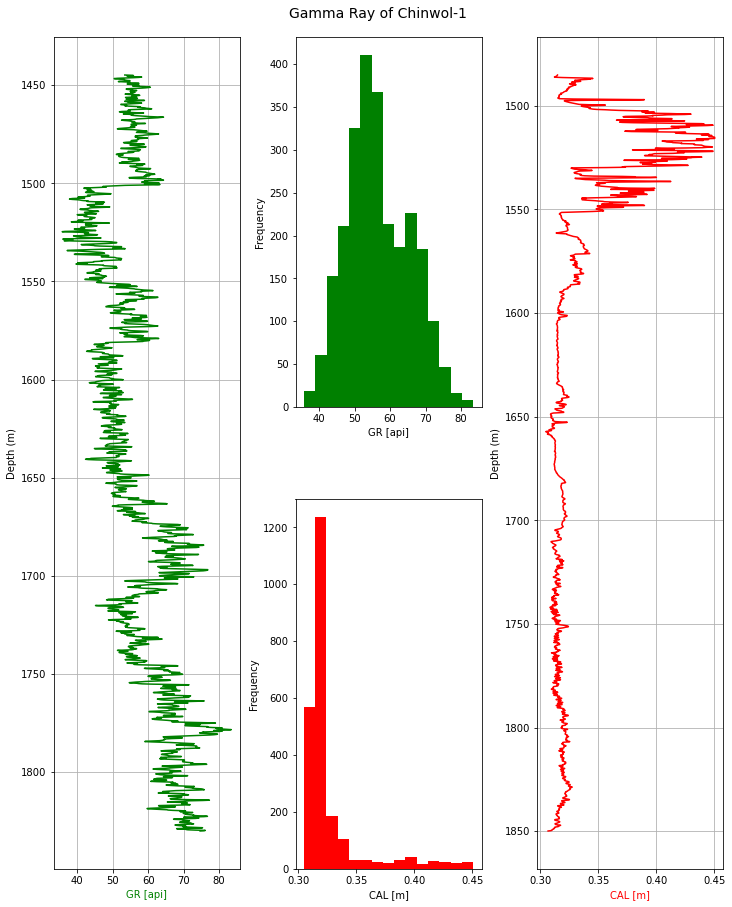

In [9]:
fig = plt.figure(figsize=(12,14))
fig.suptitle('Gamma Ray of Chinwol-1', fontsize=14)
fig.subplots_adjust(top=0.95, wspace=0.3, hspace=0.25)

gs = gridspec.GridSpec(nrows=2, ncols=3)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[:, 2])

ax1.invert_yaxis()
ax1.grid(True)
ax1.set_ylabel("Depth (m)")
ax1.plot(well_df['Chinwol_1_from_rokdoc']['GR_PEP'], well_df['Chinwol_1_from_rokdoc'].index, color="green")
ax1.set_xlabel('GR [api]', color="green")

ax2.hist(well_df['Chinwol_1_from_rokdoc']["GR_PEP"], bins=15, color="green")
ax2.set_xlabel("GR [api]")
ax2.set_ylabel("Frequency")

ax3.hist(well_df['Chinwol_1_from_rokdoc']["CALI_PEP"], bins=15, color="red")
ax3.set_xlabel('CAL [m]')
ax3.set_ylabel('Frequency')

ax4.invert_yaxis()
ax4.grid(True)
ax4.set_ylabel("Depth (m)")
ax4.plot(well_df['Chinwol_1_from_rokdoc']['CALI_PEP'], well_df['Chinwol_1_from_rokdoc'].index, color="red")
ax4.set_xlabel('CAL [m]', color="red")

In [ ]:
chinwol_df = well_df['Chinwol_1_from_rokdoc'].reset_index()

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "surface"}]])

fig.add_trace(
    px.line(chinwol_df, x="GR_COND", y="DEPT"))

fig.update_layout(
    autosize=False,
    width=300,
    height=900,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)

fig.update_yaxes(autorange='reversed', nticks=50)
fig.show()

In [51]:
well_df = {}
for files in las_files:
    well_name = os.path.splitext(os.path.basename(files))[0]
    well_df["{}".format(well_name)] = Well.from_las(files)

Header section Parameter regexp=~P was not found.
C:\Users\kew.jingsheng\Anaconda3\envs\logs_predict\lib\site-packages\welly\well.py:173: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
Header section Parameter regexp=~P was not found.


In [52]:
well_df['Chinwol_1_from_rokdoc']

Well(uwi: '', 75 curves: ['DTCO_MEAS', 'VP_DTCO_MEAS', 'CALI_PEP', 'DT_PEP', 'VP_DT_PEP', 'NETFLAG_PEP', 'NPHI_PEP', 'PAYFLAG_PEP', 'PEF_PEP', 'PHIE_PEP', 'PHIT_PEP', 'SWE_PEP', 'SWT_PEP', 'VCALC_PEP', 'VCLB_PEP', 'VCLD_PEP', 'VCLW_PEP', 'VDOLO_PEP', 'VGAS_PEP', 'VOIL_PEP', 'VSAND_PEP', 'VSHALE_PEP', 'VSILT_PEP', 'VWATER_PEP', 'DTS_PEP', 'VS_DTS_PEP', 'GR_PEP', 'AT10_COND', 'AT20_COND', 'AT30_COND', 'AT60_COND', 'AT90_COND', 'CALI_COND', 'DT_COND', 'VP_DT_COND', 'DTSM_COND', 'VS_DTSM_COND', 'GR_COND', 'NPHI_COND', 'PEF_COND', 'RHOZ_COND', 'DTSM_MEAS', 'VS_DTSM_MEAS', 'GR_MEAS', 'CALI_MEAS', 'RHOZ_MEAS', 'RHOB_PEP', 'RT_PEP', 'AT90_MEAS', 'AT10_MEAS', 'AT60_MEAS', 'AT30_MEAS', 'AT20_MEAS', 'TNPH_MEAS', 'AI_PEP', 'VELOCITY_RATIO_PEP', 'AI_MEAS', 'VELOCITY_RATIO_MEAS', 'AI_COND', 'VELOCITY_RATIO_COND', 'TG_OUT', 'C1_OUT', 'C2_OUT', 'C3_OUT', 'IC4_OUT', 'NC4_OUT', 'IC5_OUT', 'NC5_OUT', 'CO2_OUT', 'H2S_OUT', 'MW_IN', 'MW_OUT', 'ROP', 'SPP', 'PVT'])

In [57]:
logs = well_df['Chinwol_1_from_rokdoc'].data['GR_COND']

In [59]:
logs.basis

array([ 492.    ,  492.1524,  492.3048, ..., 1854.6084, 1854.7608,
       1854.9132])